In [1]:
import pandas as pd
from tqdm import tqdm
from collections import Counter
import matplotlib.pyplot as plt
import spacy
from sklearn.model_selection import train_test_split
from fastai.text.all import *
import torch
import wandb
from fastai.callback.wandb import *
from sklearn.utils import resample


In [2]:
# Set device to GPU if available
if torch.cuda.is_available():
    print('GPU available. Using GPU...')
    torch.device('cuda')
else:
    print('No GPU available. Using CPU...')
    torch.device('cpu')


GPU available. Using GPU...


In [3]:
# Initialize wandb
wandb.init(project="LangAI-Assignment", name="ULMFiT-1")


wandb: Currently logged in as: julia-dobladez. Use `wandb login --relogin` to force relogin


In [4]:
df = pd.read_csv("lai-data/nationality.csv")

df

,auhtor_ID,post,nationality
0,t2_10uons,"It isn't, it's just for show. It isn't legally binding. Depends And also for most ranks it's better to play something you're good at, rather than playing someone you're bad at but is meta/countering The added risk of fire with it on the side is basically 0 Yeah technically it does increase the risk. But it's so small it's basically like being worried that a drop of water on the road will cause an accident. Aaahh yes. UK and US. The only two nations in the world Hint: other countries do also have kettles Yeah that's Apple for you Because you're basically joining the war purely for the reaso...",Finland
1,t2_10uons,"games won to games played. Games played is calculated compared to how much of the match you played. Eg. You played half match as mercy, you get 0.5 matches played to mercy. Matches won seems to be that you either win or you don't, nothing in between. So your first game as mercy, playing half the game and you won, means the winrate would be 1 (wins) / 0.5 (games played) = 2 = 200% winrate. Can't confirm if it works like this but this is my guess on how it works. I do. It's cheaper and works just as well. Considering it has hotel in the name, I'm guessing it's meant for hotels. Yeah i guess ...",Finland
2,t2_10uons,"So with that logic USA is a very shitty place to live (with ~1 shooting per million people) and literally every other nation being a better place to live in (with China being the best) Good bot It seems like a morning news show so they are more casual/chill than news normally are. Keep in mind what you see in the video is presumably the first and only thing that they know about furries, and it is understand that you would be confused. I'm guessing she's having one of those moments where when you're not allowed laugh, just makes it harder not to laugh. This clip is ~9 years old Nah it makes...",Finland
3,t2_10uons,"are referring to It does add up a lot when EA, Activision etc.. can re-release the same game each year! And also like they would be better than recommendations. It depends on many factors. Kyllä. Tuntuu paremmalta koska se käytännössä on ""ilmaista rahaa"". Olet jo valmiiksi suunnitellut elämään nykyisillä tuloilla ja yllättäen tulee sitten joku 600€ extra käytettäväksi. Objektiiviset ei ole hyvä säästämiseen mutta käytännössä on. Siinä on huomattava tunne ero jos saa 600€ yllättäen, tai jos laittaa 50€ kuukaudessa sivuun. Pitää myöskin ottaa huomioon että tuleeko sitä oikeasti säästettyä 60...",Finland
4,t2_10uons,"get another role than support Lel people here thinking 23 is some huge number that you must be a whore to achieve by 22 Of course it can happen anywhere. But the difference is that it happens far less in other places. Your logic is like saying schools are dangerous everywhere because the US has a shooting like once a week. Wouldn't be surprised. This gets way more engagement than if they'd just pour water on it. Nothing cursed about it tho ""Wow. This tool works well for its intended purpose but would not work so well for something it wasn't designed for"" Are you infuriated that someone rus...",Finland
...,...,...,...
82611,t2_57ogt82f,"and Sergeant York. WWI didn't lend it'self to films. Most of it was fought in cold wet trenches in Northern Europe. Much of the time was spent waiting for the next round of shelling. By contrast WWII was fought on every continent. This gave film makers far more opportunity to feature exotic places and scantly clad local women. There are no surviving military from WWI and an ever reducing number from WWII. So for WWI there are only people like myself who have talked with people who fought in it. Both my grandfaters talked about it, and the thing which always came up was the cold, damp condi...",United Kingdom
82612,t2_57ogt82f,"a position where a person can get short term fame by committing atrocities. I don't think clamping down on guns is the answer. Any control strong enough to make a difference would not be a

In [3]:
df_europe = pd.read_csv("lai-data/western_token_lemma.csv")

df_europe

,Western,transformed
0,True,"['a', 'game', 'that', 'ended', 'up', 'being', 'more', 'popular', 'than', 'Halo', 'certainly', 'does', 'sound', 'like', 'a', 'company', 'that', '’s', 'a', 'former', 'shell', 'of', 'itself', '.', 'Also', 'is', 'n’t', 'that', 'a', 'good', 'thing', 'since', 'Bungie', 'wanted', 'to', 'move', 'on', 'from', 'Halo', '?', 'Who', 'wants', 'to', 'work', 'on', 'the', 'same', 'franchise', 'for', '15', 'years', 'straight', '.', 'I', 'mean', 'these', 'are', 'people', 'with', 'jobs', 'and', 'they', 'are', 'putting', 'that', 'all', 'on', 'the', 'line', 'for', 'nothing', '.', 'The', 'leaks', 'are', 'done', ..."
1,True,"['it', 'means', 'being', 'more', 'individual', 'parts', 'than', 'a', 'functional', 'whole', '.', '""', 'Flügel', '""', 'is', 'kind', 'of', 'the', 'most', 'important', 'part', 'of', 'a', '(', 'stereotypical', ')', 'bird', ',', 'yet', ',', 'it', 'can', 'not', 'get', 'the', 'job', 'done', 'on', 'its', 'own', '.', 'I', ""'d"", 'say', 'they', 'should', 'team', 'up', 'with', 'everyone', '.', 'ISS', 'was', 'such', 'a', 'cool', 'perspective', '.', 'Beavies', '&', 'amp', ';', 'Butthead', 'Absolutely', '.', 'New', 'add', '-', 'on', 'right', 'at', 'the', 'doorstep', 'and', 'to', 'be', 'released', 'in', '..."
2,True,"['ST4', 'job', 'does', ""n't"", 'mean', 'you', ""'re"", 'training', 'enough', 'Consultants', ')', '.', 'I', ""'m"", 'just', 'an', 'ST1', ',', 'standing', 'in', 'front', 'of', 'a', 'clinician', ',', 'asking', 'you', 'to', 'commit', 'to', 'whether', 'mesenteric', 'ischaemia', 'is', 'the', 'top', 'differential', '.', 'Who', 'else', 'will', 'load', 'the', 'CTs', 'so', 'the', 'oncologists', 'can', 'know', 'if', 'lymph', 'node', '4L', 'has', 'reduced', 'in', 'size', 'by', 'more', 'than', '50', '%', '.', '&', 'gt;AF', 'Stroke', 'bad', '.', 'Everyone', 'stressed', 'about', 'over', 'NICE', 'CT', 'guideli..."
3,True,"['interventi', 'necessari', 'durante', 'una', 'delle', 'più', 'grosse', 'crisi', 'economiche', '.', 'No', ',', 'non', 'sarebbe', 'andata', 'meglio', 'avesse', 'vinto', 'il', 'centrosinistra', 'ma', 'sarei', 'stato', 'un', '70', '%', 'più', 'tranquillo', 'di', 'non', 'rischiare', 'un', 'default', 'nei', 'prossimi', 'due', 'anni', 'e', 'questo', 'mi', 'basta', 'e', 'avanza', '.', 'Non', ""c'era"", 'il', 'centrosinistra', 'nel', 'mentre', 'che', 'stavamo', ""sull'orlo"", 'del', 'default', 'e', 'non', 'è', 'il', 'centrosinistra', 'a', 'far', 'schizzare', 'lo', 'spread', 'bruciando', 'milioni', 'so..."
4,True,"['galenpannor', '!', 'www.falskvaxxinationstid.nu/boka', 'www.falskvaxxinations', 'tid.nu', 'Glömde', 'att', 'det', 'ska', 'vara', 'mellanslag', 'Här', 'är', 'vi', 'bara', 'lagom', 'galenpannor', '!', 'Fast', 'är', 'inte', 'miljöfrågan', 'viktigare', 'än', 'att', 'vi', 'ska', 'öka', 'befolkningen', 'så', 'mycket', 'vi', 'kan', '?', 'Alla', 'lär', 'ju', 'dö', 'om', '100', 'år', 'ändå', 'i', 'denna', 'takten', '.', 'Så', 'att', 'ta', 'in', 'människor', 'från', 'länder', 'där', 'co2', 'utsläppet', 'är', 'lågt', 'till', 'ett', 'land', 'med', 'högt', 'co2', 'gör', 'ju', 'motsatsen', '.', 'Sen',..."
...,...,...
31305,False,"['to', 'raid', 'the', 'in', 'vitro', 'facilities', '.', 'Good', 'hunt', '!', 'Do', 'you', 'mean', 'government', 'or', 'nation', 'with', 'this', 'map', '?', 'Polands', 'gov', 'is', 'authcenter', '.', 'Christian', 'socialist', '.', 'Nation', 'is', 'radical', 'centrist', 'with', 'every', 'person', 'knowing', 'what', ""'s"", 'the', 'best', 'for', 'the', 'country', 'and', 'fighting', 'each', 'other', 'over', 'it', 'We', 'do', 'nt', 'need', 'to', 'win', '.', 'We', 'just', 'want', 'Russia', 'to', 'lose', '.', 'Do', 'nt', 'forget', 'selling', 'vodka', 'with', '6', '%', 'alcohol', 'in', 'it', 'HEY', ..."
31306,False,"['homemade', 'ones', 'kill', 'people', 'there', 'were', 'already', 'multiple', 'polish', 'women', 'that', 'died', 'this', 'way', '-You', 'want', 'to', 'go', 'full', 'California', 'and', 'start', 'giving', 'addicts', 'clean', 'syringes', 'so', 'they', 'wo', 'nt', 'die', '?', 'No'

In [3]:
df = pd.read_csv("lai-data/tokenized_eng.csv")
df

,Unnamed: 0,auhtor_ID,post,nationality,Poles,tokens,eng_tokens,average_word_length,avg_sentence_length
0,0,t2_10uons,"isn't, show. legally binding. depends also rank better play something good at, rather playing someone bad meta/countering added risk fire side basically 0 yeah technically increase risk. small basically like worried drop water road cause accident. aaahh yes. uk us. two nation world hint: country also kettle yeah that's apple basically joining war purely reason back one side. however ask want join war ""reward"" (eg. obligation). also use system sway countries. defending minor nation beneficial even get anything directly it. u game, canada (hudson bay company) tried anex iron confederacy, hel...",Finland,Western,"['is', ""n't"", ',', 'show', '.', 'legally', 'binding', '.', 'depends', 'also', 'rank', 'better', 'play', 'something', 'good', 'at', ',', 'rather', 'playing', 'someone', 'bad', 'meta', '/', 'countering', 'added', 'risk', 'fire', 'side', 'basically', '0', 'yeah', 'technically', 'increase', 'risk', '.', 'small', 'basically', 'like', 'worried', 'drop', 'water', 'road', 'cause', 'accident', '.', 'aaahh', 'yes', '.', 'uk', 'us', '.', 'two', 'nation', 'world', 'hint', ':', 'country', 'also', 'kettle', 'yeah', 'that', ""'s"", 'apple', 'basically', 'joining', 'war', 'purely', 'reason', 'back', 'one', ...","[""'is'"", ""'n'"", ""'t'"", ""'show'"", ""'legally'"", ""'binding'"", ""'also'"", ""'rank'"", ""'better'"", ""'play'"", ""'something'"", ""'good'"", ""'at'"", ""'rather'"", ""'someone'"", ""'bad'"", ""'meta'"", ""'added'"", ""'risk'"", ""'fire'"", ""'side'"", ""'basically'"", ""'yeah'"", ""'technically'"", ""'increase'"", ""'risk'"", ""'small'"", ""'basically'"", ""'like'"", ""'worried'"", ""'drop'"", ""'water'"", ""'road'"", ""'cause'"", ""'accident'"", ""'yes'"", ""'us'"", ""'two'"", ""'nation'"", ""'world'"", ""'hint'"", ""'country'"", ""'also'"", ""'kettle'"", ""'yeah'"", ""'that'"", ""'s'"", ""'apple'"", ""'basically'"", ""'joining'"", ""'war'"", ""'purely'"", ""'reason'"", ""'back'"", ""'o...",5.744459,50.730000
1,1,t2_10uons,"game game played. game played calculated compared much match played. eg. played half match mercy, get 0.5 match played mercy. match seems either win don't, nothing between. first game mercy, playing half game won, mean winrate would 1 (wins) / 0.5 (games played) = 2 = 200% winrate. can't confirm work like guess works. do. cheaper work well. considering hotel name, i'm guessing meant hotels. yeah guess would work like that. new hero coming december seems like good time test it. fix could also make hero win ratio much game played. could break something spaghetti code game usually trying conv...",Finland,Western,"['game', 'game', 'played', '.', 'game', 'played', 'calculated', 'compared', 'much', 'match', 'played', '.', 'eg', '.', 'played', 'half', 'match', 'mercy', ',', 'get', '0.5', 'match', 'played', 'mercy', '.', 'match', 'seems', 'either', 'win', 'do', ""n't"", ',', 'nothing', 'between', '.', 'first', 'game', 'mercy', ',', 'playing', 'half', 'game', 'won', ',', 'mean', 'winrate', 'would', '1', '(', 'wins', ')', '/', '0.5', '(', 'games', 'played', ')', '=', '2', '=', '200', '%', 'winrate', '.', 'ca', ""n't"", 'confirm', 'work', 'like', 'guess', 'works', '.', 'do', '.', 'cheaper', 'work', 'well', '.'...","[""'game'"", ""'game'"", ""'game'"", ""'calculated'"", ""'much'"", ""'match'"", ""'half'"", ""'match'"", ""'mercy'"", ""'get'"", ""'match'"", ""'mercy'"", ""'match'"", ""'either'"", ""'win'"", ""'do'"", ""'n'"", ""'t'"", ""'nothing'"", ""'between'"", ""'first'"", ""'game'"", ""'mercy'"", ""'half'"", ""'game'"", ""'won'"", ""'mean'"", ""'would'"", ""'ca'"", ""'n'"", ""'t'"", ""'confirm'"", ""'work'"", ""'like'"", ""'guess'"", ""'works'"", ""'do'"", ""'work'"", ""'well'"", ""'considering'"", ""'hotel'"", ""'name'"", ""'i'"", ""'m'"", ""'guessing'"", ""'meant'"", ""'yeah'"", ""'guess'"", ""'would'"", ""'work'"", ""'like'"", ""'that'"", ""'new'"", ""'hero'"", ""'coming'"", ""'like'""

In [4]:
df.drop(columns=['Unnamed: 0', 'auhtor_ID', 'nationality', 'post'], inplace=True)
        
df

,Poles,tokens,eng_tokens,average_word_length,avg_sentence_length
0,Western,"['is', ""n't"", ',', 'show', '.', 'legally', 'binding', '.', 'depends', 'also', 'rank', 'better', 'play', 'something', 'good', 'at', ',', 'rather', 'playing', 'someone', 'bad', 'meta', '/', 'countering', 'added', 'risk', 'fire', 'side', 'basically', '0', 'yeah', 'technically', 'increase', 'risk', '.', 'small', 'basically', 'like', 'worried', 'drop', 'water', 'road', 'cause', 'accident', '.', 'aaahh', 'yes', '.', 'uk', 'us', '.', 'two', 'nation', 'world', 'hint', ':', 'country', 'also', 'kettle', 'yeah', 'that', ""'s"", 'apple', 'basically', 'joining', 'war', 'purely', 'reason', 'back', 'one', ...","[""'is'"", ""'n'"", ""'t'"", ""'show'"", ""'legally'"", ""'binding'"", ""'also'"", ""'rank'"", ""'better'"", ""'play'"", ""'something'"", ""'good'"", ""'at'"", ""'rather'"", ""'someone'"", ""'bad'"", ""'meta'"", ""'added'"", ""'risk'"", ""'fire'"", ""'side'"", ""'basically'"", ""'yeah'"", ""'technically'"", ""'increase'"", ""'risk'"", ""'small'"", ""'basically'"", ""'like'"", ""'worried'"", ""'drop'"", ""'water'"", ""'road'"", ""'cause'"", ""'accident'"", ""'yes'"", ""'us'"", ""'two'"", ""'nation'"", ""'world'"", ""'hint'"", ""'country'"", ""'also'"", ""'kettle'"", ""'yeah'"", ""'that'"", ""'s'"", ""'apple'"", ""'basically'"", ""'joining'"", ""'war'"", ""'purely'"", ""'reason'"", ""'back'"", ""'o...",5.744459,50.730000
1,Western,"['game', 'game', 'played', '.', 'game', 'played', 'calculated', 'compared', 'much', 'match', 'played', '.', 'eg', '.', 'played', 'half', 'match', 'mercy', ',', 'get', '0.5', 'match', 'played', 'mercy', '.', 'match', 'seems', 'either', 'win', 'do', ""n't"", ',', 'nothing', 'between', '.', 'first', 'game', 'mercy', ',', 'playing', 'half', 'game', 'won', ',', 'mean', 'winrate', 'would', '1', '(', 'wins', ')', '/', '0.5', '(', 'games', 'played', ')', '=', '2', '=', '200', '%', 'winrate', '.', 'ca', ""n't"", 'confirm', 'work', 'like', 'guess', 'works', '.', 'do', '.', 'cheaper', 'work', 'well', '.'...","[""'game'"", ""'game'"", ""'game'"", ""'calculated'"", ""'much'"", ""'match'"", ""'half'"", ""'match'"", ""'mercy'"", ""'get'"", ""'match'"", ""'mercy'"", ""'match'"", ""'either'"", ""'win'"", ""'do'"", ""'n'"", ""'t'"", ""'nothing'"", ""'between'"", ""'first'"", ""'game'"", ""'mercy'"", ""'half'"", ""'game'"", ""'won'"", ""'mean'"", ""'would'"", ""'ca'"", ""'n'"", ""'t'"", ""'confirm'"", ""'work'"", ""'like'"", ""'guess'"", ""'works'"", ""'do'"", ""'work'"", ""'well'"", ""'considering'"", ""'hotel'"", ""'name'"", ""'i'"", ""'m'"", ""'guessing'"", ""'meant'"", ""'yeah'"", ""'guess'"", ""'would'"", ""'work'"", ""'like'"", ""'that'"", ""'new'"", ""'hero'"", ""'coming'"", ""'like'"", ""'good'"", ""'time'""...",5.815094,50.113208
2,Western,"['logic', 'usa', 'shitty', 'place', 'live', '(', 'with', '~1', 'shooting', 'per', 'million', 'people', ')', 'literally', 'every', 'nation', 'better', 'place', 'live', '(', 'with', 'china', 'best', ')', 'good', 'bot', 'seems', 'like', 'morning', 'news', 'show', 'casual', '/', 'chill', 'news', 'normally', 'are', '.', 'keep', 'mind', 'see', 'video', 'presumably', 'first', 'thing', 'know', 'furries', ',', 'understand', 'would', 'confused', '.', 'i', ""'m"", 'guessing', 'one', 'moment', 'allowed', 'laugh', ',', 'make', 'harder', 'laugh', '.', 'clip', '~9', 'year', 'old', 'nah', 'make', 'perfect',...","[""'logic'"", ""'place'"", ""'live'"", ""'with'"", ""'shooting'"", ""'per'"", ""'million'"", ""'people'"", ""'literally'"", ""'every'"", ""'nation'"", ""'better'"", ""'place'"", ""'live'"", ""'with'"", ""'china'"", ""'best'"", ""'good'"", ""'bot'"", ""'like'"", ""'morning'"", ""'news'"", ""'show'"", ""'casual'"", ""'chill'"", ""'news'"", ""'normally'"", ""'are'"", ""'keep'"", ""'mind'"", ""'see'"", ""'video'"", ""'presumably'"", ""'first'"", ""'thing'"", ""'know'"", ""'understand'"", ""'would'"", ""'confused'"", ""'i'"", ""'m'"", ""'guessing'"", ""'one'"", ""'moment'"", ""'laugh'"", ""'make'"", ""'harder'"", ""'la

In [4]:
df.nationality.unique()

array(['Finland', 'Germany', 'Greece', 'The Netherlands', 'Ireland',
       'Spain', 'USA', 'United Kingdom', 'Denmark', 'Turkey', 'France',
       'Italy', 'Lithuania', 'Poland', 'Sweden', 'Romania', 'Switzerland',
       'Norway', 'Bulgaria', 'Hungary', 'Belgium', 'Serbia', 'Austria',
       'Ukraine', 'Croatia', 'Japan', 'Slovenia', 'Czech Republic',
       'Slovakia', 'Brazil', 'Australia', 'Cyprus', 'Luxembourg',
       'Argentina', 'Estonia', 'Philippines', 'Portugal', 'Azerbaijan',
       'Kosovo', 'Canada', 'Bosnia and Herzegovina', 'Israel', 'Mexico',
       'Armenia', 'Iceland', 'Albania', 'Georgia', 'Russia', 'Montenegro',
       'Moldova', 'Kazakhstan', 'Malta', 'Greenland', 'North Macedonia',
       'Iran', 'Chili'], dtype=object)

In [5]:
european_countries = ["Finland", "Germany", "Greece", "The Netherlands", "Ireland", "Spain", "United Kingdom", "Denmark", "France", "Italy", "Lithuania", "Poland", "Sweden", "Romania", "Switzerland", "Norway", "Bulgaria", "Hungary", "Belgium", "Serbia", "Austria", "Ukraine", "Croatia", "Slovenia", "Czech Republic", "Slovakia", "Cyprus", "Luxembourg", "Estonia", "Portugal", "Kosovo", "Bosnia and Herzegovina", "Iceland", "Albania", "Russia", "Montenegro", "Moldova", "Malta", "Greenland", "North Macedonia"]

df_europe = df[df["nationality"].isin(european_countries)].copy()

western = ["Finland", "Germany", "Greece", "The Netherlands", "Ireland", "Spain", "United Kingdom", "Denmark", "France", "Italy", "Sweden", "Switzerland", "Norway", "Belgium", "Austria", "Portugal", "Luxembourg", "Iceland", "Greenland", "Malta"]

df_europe.loc[:, "Western"] = df_europe["nationality"].apply(lambda x: x in western)

df_europe

,auhtor_ID,post,nationality,Western
0,t2_10uons,"It isn't, it's just for show. It isn't legally binding. Depends And also for most ranks it's better to play something you're good at, rather than playing someone you're bad at but is meta/countering The added risk of fire with it on the side is basically 0 Yeah technically it does increase the risk. But it's so small it's basically like being worried that a drop of water on the road will cause an accident. Aaahh yes. UK and US. The only two nations in the world Hint: other countries do also have kettles Yeah that's Apple for you Because you're basically joining the war purely for the reaso...",Finland,True
1,t2_10uons,"games won to games played. Games played is calculated compared to how much of the match you played. Eg. You played half match as mercy, you get 0.5 matches played to mercy. Matches won seems to be that you either win or you don't, nothing in between. So your first game as mercy, playing half the game and you won, means the winrate would be 1 (wins) / 0.5 (games played) = 2 = 200% winrate. Can't confirm if it works like this but this is my guess on how it works. I do. It's cheaper and works just as well. Considering it has hotel in the name, I'm guessing it's meant for hotels. Yeah i guess ...",Finland,True
2,t2_10uons,"So with that logic USA is a very shitty place to live (with ~1 shooting per million people) and literally every other nation being a better place to live in (with China being the best) Good bot It seems like a morning news show so they are more casual/chill than news normally are. Keep in mind what you see in the video is presumably the first and only thing that they know about furries, and it is understand that you would be confused. I'm guessing she's having one of those moments where when you're not allowed laugh, just makes it harder not to laugh. This clip is ~9 years old Nah it makes...",Finland,True
3,t2_10uons,"are referring to It does add up a lot when EA, Activision etc.. can re-release the same game each year! And also like they would be better than recommendations. It depends on many factors. Kyllä. Tuntuu paremmalta koska se käytännössä on ""ilmaista rahaa"". Olet jo valmiiksi suunnitellut elämään nykyisillä tuloilla ja yllättäen tulee sitten joku 600€ extra käytettäväksi. Objektiiviset ei ole hyvä säästämiseen mutta käytännössä on. Siinä on huomattava tunne ero jos saa 600€ yllättäen, tai jos laittaa 50€ kuukaudessa sivuun. Pitää myöskin ottaa huomioon että tuleeko sitä oikeasti säästettyä 60...",Finland,True
4,t2_10uons,"get another role than support Lel people here thinking 23 is some huge number that you must be a whore to achieve by 22 Of course it can happen anywhere. But the difference is that it happens far less in other places. Your logic is like saying schools are dangerous everywhere because the US has a shooting like once a week. Wouldn't be surprised. This gets way more engagement than if they'd just pour water on it. Nothing cursed about it tho ""Wow. This tool works well for its intended purpose but would not work so well for something it wasn't designed for"" Are you infuriated that someone rus...",Finland,True
...,...,...,...,...
82611,t2_57ogt82f,"and Sergeant York. WWI didn't lend it'self to films. Most of it was fought in cold wet trenches in Northern Europe. Much of the time was spent waiting for the next round of shelling. By contrast WWII was fought on every continent. This gave film makers far more opportunity to feature exotic places and scantly clad local women. There are no surviving military from WWI and an ever reducing number from WWII. So for WWI there are only people like myself who have talked with people who fought in it. Both my grandfaters talked about it, and the thing which always came up was the cold, damp condi...",United Kingdom,True
82612,t2_57ogt82f,"a position where a person can get short term fame by committing atrocities. I don't think clamping down on guns is the answer. Any control strong 

In [17]:
len(df[df['Poles'] == "Western"])

60934

In [18]:
len(df[df['Poles'] == "Eastern"])

15471

In [5]:
df_europe.describe()

,auhtor_ID,post,nationality,Western
count,71833,71833,71833,71833
unique,2085,71832,40,2
top,t2_dj2ua,Fuck Fuck Fuck Fuck Fuck Fuck Fuck Fuck fuck fuck fuck fuck fuck fuck fuck fuck fuck fuck fuck fuck Fuck Fuck Fuck Fuck Fuck Fuck Fuck Fuck fuck fuck fuck fuck fuck fuck fuck fuck fuck fuck fuck fuck Fuck Fuck Fuck Fuck Fuck Fuck Fuck Fuck fuck fuck fuck fuck fuck fuck fuck fuck fuck fuck fuck fuck Fuck Fuck Fuck Fuck Fuck Fuck Fuck Fuck fuck fuck fuck fuck fuck fuck fuck fuck fuck fuck fuck fuck Fuck Fuck Fuck Fuck Fuck Fuck Fuck Fuck fuck fuck fuck fuck fuck fuck fuck fuck fuck fuck fuck fuck Fuck Fuck Fuck Fuck Fuck Fuck Fuck Fuck fuck fuck fuck fuck fuck fuck fuck fuck fuck fuck fuck f...,Germany,True
freq,1031,2,12838,56178


In [6]:
df_europe.dtypes

auhtor_ID      object
post           object
nationality    object
Western          bool
dtype: object

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


X = df['tokens']
y = df['Poles']
vectorizer = TfidfVectorizer(sublinear_tf=True)  # You may need to configure this according to your needs
X_vec = vectorizer.fit_transform(X)
print(X_vec.shape)

(76405, 1507823)


MemoryError: Unable to allocate 858. GiB for an array with shape (76405, 1507823) and data type float64

In [6]:
X.shape

(76405,)

In [24]:
from imblearn.over_sampling import RandomOverSampler

over = RandomOverSampler(sampling_strategy=0.5, random_state = 42)
under = RandomUnderSampler(sampling_strategy=0.5, random_state = 345)

X_over, y_over = over.fit_resample(X_vec, y)

In [20]:
(y_over == 'Eastern').sum()

30467

In [22]:
(y_over == 'Western').sum()

60934

In [21]:
X_over.shape[0]

91401

In [30]:
under = RandomUnderSampler(sampling_strategy='majority', random_state = 345)

X_balanced, y_balanced = under.fit_resample(X_over, y_over)

In [31]:
X_balanced.shape[0]

60934

In [32]:
(y_balanced == 'Eastern').sum()

30467

In [33]:
(y_balanced == 'Western').sum()

30467

In [5]:
west_data = df[df['Poles'] == "Western"]
east_data = df[df['Poles'] == "Eastern"]

# Undersample majority class to match minority class
undersampled_majority = resample(west_data,
                                 replace=False,  # Sample without replacement
                                 n_samples=len(east_data),  # Match minority class size
                      #%%
           random_state=42)  # Set a random state for reproducibility

# Concatenate minority class and undersampled majority class
undersampled_df = pd.concat([undersampled_majority, east_data])


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

X_undersampled_text = undersampled_df['tokens']

# Vectorize text data (using TF-IDF for example)
vectorizer = TfidfVectorizer(sublinear_tf=True)  # You may need to configure this according to your needs
X_undersampled = vectorizer.fit_transform(X_undersampled_text)

In [11]:
from imblearn.over_sampling import SMOTE


y_undersampled = undersampled_df['Poles']

# Separate majority and minority classes
majority_class = X_undersampled[y_undersampled == 'Western']
minority_class = X_undersampled[y_undersampled == 'Eastern']

# Apply SMOTE only to the minority class
smote = SMOTE(random_state=42)
X_resampled_minority, y_resampled_minority = smote.fit_resample(minority_class, y_undersampled[y_undersampled == 'Eastern'])


ValueError: The target 'y' needs to have more than 1 class. Got 1 class instead

In [7]:
undersampled_df

,Poles,tokens,eng_tokens,average_word_length,avg_sentence_length
39852,Western,"['everything', 'can', 'not', 'generalized', 'co2', 'cost', 'enviromental', 'impact', 'certain', 'diet', 'depends', 'live', '?', 'firstly', 'mostly', 'sheep', 'grazing', ',', 'bring', 'cows', ',', 'cow', 'absolutely', 'sustain', 'grazing', '.', 'arguing', 'factory', 'farming', ',', 'talking', 'here', '.', 'realize', 'meat', 'production', 'actually', 'done', 'sustainably', '?', 'dense', '?', 'think', 'everyone', 'feeding', 'cow', 'corn', 'soy', '?', 'agree', 'factory', 'farming', 'significant', 'contributor', 'co2', ',', 'can', 'not', 'make', 'distinction', 'wasting', 'time', 'here', '.', 'm...","[""'everything'"", ""'can'"", ""'not'"", ""'generalized'"", ""'cost'"", ""'impact'"", ""'certain'"", ""'diet'"", ""'live'"", ""'firstly'"", ""'mostly'"", ""'sheep'"", ""'grazing'"", ""'bring'"", ""'cow'"", ""'absolutely'"", ""'sustain'"", ""'grazing'"", ""'factory'"", ""'farming'"", ""'talking'"", ""'here'"", ""'realize'"", ""'meat'"", ""'production'"", ""'actually'"", ""'done'"", ""'dense'"", ""'think'"", ""'everyone'"", ""'feeding'"", ""'cow'"", ""'corn'"", ""'soy'"", ""'agree'"", ""'factory'"", ""'farming'"", ""'significant'"", ""'contributor'"", ""'can'"", ""'not'"", ""'make'"", ""'distinction'"", ""'wasting'"", ""'time'"", ""'here'"", ""'maybe'"", ""'realize'"", ""'thread'"", ""'in...",5.748591,51.508772
57664,Western,"['trump', ""'s"", 'favour', ',', 'would', 'posting', 'this', '?', '#', 'facts', 'also', 'say', 'russia', 'manipulated', '2016', '.', 'bet', 'support', '#', 'facts', 'way', 'support', '#', 'facts', ',', 'opinion', 'pro-#facts', ',', 'pro-#trump', '.', 'trump', ""'s"", 'coup', 'ineffective', '.', 'projecting', '.', 'spoiler', ':', 'trump', 'terrible', 'many', 'people', 'voted', 'him', '.', 'seriously', ',', 'happy', 'biden', ',', 'team', 'offered', 'someone', 'better', '.', 'almost', 'like', 'democrat', 'party', 'liberal', ',', 'liberal', 'party', '!', 'someone', 'tell', 'gay', 'marriage', 'stil...","[""'trump'"", ""'s'"", ""'would'"", ""'posting'"", ""'this'"", ""'also'"", ""'say'"", ""'russia'"", ""'bet'"", ""'support'"", ""'way'"", ""'support'"", ""'opinion'"", ""'pro'"", ""'pro'"", ""'trump'"", ""'trump'"", ""'s'"", ""'coup'"", ""'ineffective'"", ""'projecting'"", ""'spoiler'"", ""'trump'"", ""'terrible'"", ""'many'"", ""'people'"", ""'him'"", ""'seriously'"", ""'happy'"", ""'team'"", ""'someone'"", ""'better'"", ""'almost'"", ""'like'"", ""'democrat'"", ""'party'"", ""'liberal'"", ""'liberal'"", ""'party'"", ""'someone'"", ""'tell'"", ""'gay'"", ""'marriage'"", ""'still'"", ""'legal'"", ""'west'"", ""'thanks'"", ""'alert'"", ""'easy'"", ""'already'"", ""'notice'"", ""'shill'"", ""'fr...",6.072072,46.782609
6463,Western,"['thought', 'like', 'comparing', 'south', 'american', 'club', 'european', 'club', 'football', 'seems', 'lot', 'closer', 'that', '!', 'uninstall', 'intel', 'graphic', 'driver', 'reinstall', 'me', '.', 'sadly', 'do', 'nt', 'it', '.', 'world', 'ending', 'though', 'people', 'working', 'ending', 'world', '.', 'sub', 'place', 'nazi', 'cosplay', 'leftists', '.', 'nuts', ',', 'grain', 'bean', 'friend', '.', 'though', '?', 'sound', 'great', ',', 'match', 'streamed', '?', 'always', 'biggest', 'fear', 'driving', 'idiot', 'swerve', 'lane', 'collides', 'head', 'on', '.', 'absolutely', 'aweful', ':(', '...","[""'thought'"", ""'like'"", ""'south'"", ""'club'"", ""'club'"", ""'football'"", ""'lot'"", ""'closer'"", ""'that'"", ""'graphic'"", ""'driver'"", ""'reinstall'"", ""'me'"", ""'sadly'"", ""'do'"", ""'it'"", ""'world'"", ""'ending'"", ""'though'"", ""'people'"", ""'working'"", ""'ending'"", ""'world'"", ""'sub'"", ""'place'"", ""'grain'"", ""'bean'"", ""'friend'"", ""'though'"", ""'sound'"", ""'great'"", ""'match'"", ""'always'"", ""'biggest'"", ""'fear'"", ""'driving'"", ""'idiot'"", ""'swerve'"", ""'lane'"", ""'head'"", ""'on'"", ""'absolutely'"", ""'rip'"", ""'sorry'"", ""'did'"", ""'mean'"", ""'like'"", ""'that'"", ""'was'"", 

In [8]:
X_undersampled_text = undersampled_df['tokens']
y_undersampled = undersampled_df['Poles']


In [6]:
df_europe = undersampled_df.copy()

In [9]:
punctuation_matches = df_europe.post.str.findall('[^\w\s]') # matches any character that is not a word character(\w) or a whitespace character(\s).

tokens = df_europe.post.str.findall('\w+|[^\w\s]') # match either a sequence of word characters or any non-word, non-space character.

df_europe['token'] = tokens

tokens.head(5)


KeyboardInterrupt



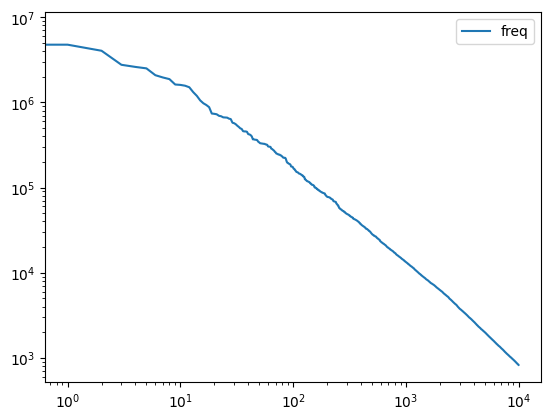

In [7]:
c = Counter()
for token in tokens:
    c += Counter(token)

ax = pd.DataFrame(c.most_common(10000),
                  columns=['word', 'freq']).plot(loglog=True)
plt.show()

In [4]:
def top_words_per_subreddit(labels, token_df):
    counters = {label: Counter() for label in labels}
    for ix, row in tqdm(df.iterrows()): # tqdm is a Python library that provides a fast, extensible progress bar for loops and other iterable processes in Python.
        counters[row.nationality] += Counter(row.token)
    top_words = {label: set([w for w, i in c.most_common(5000)]) for label, c in counters.items()}
    unique_words = {}
    for i, set_i, in top_words.items():
        master_set = set()
        for j, set_j in top_words.items():
            if i == j:
                continue
            master_set = master_set.union(set_j)
        unique_words[i] = set_i - master_set
    return unique_words

top_labels = top_words_per_subreddit(european_countries, df_europe)
top_labels

82616it [04:26, 309.86it/s] 


{'Finland': {'205',
  'Aika',
  'Ainakin',
  'Anthy',
  'D1',
  'DT8',
  'Datsun',
  'Denji',
  'ED',
  'Editing',
  'Ehkä',
  'Eihän',
  'Eikä',
  'Eikö',
  'Eiköhän',
  'Eli',
  'Esim',
  'Esimerkiksi',
  'Että',
  'FAQ',
  'FDF',
  'Finn',
  'Formatting',
  'GPT',
  'GTI',
  'Gundam',
  'Helsingin',
  'Helsingissä',
  'Hyvä',
  'IR',
  'Ihan',
  'Itsellä',
  'Jep',
  'Johan',
  'Joo',
  'Juu',
  'Kaguya',
  'Kaikki',
  'Kannattaa',
  'Karelian',
  'Karelians',
  'Kiinan',
  'Kiitos',
  'Kizu',
  'Koska',
  'Kuitenkin',
  'Kyllä',
  'Kyllähän',
  'LN',
  'Lapland',
  'Lisäksi',
  'MAX',
  'Madoka',
  'Marin',
  'Meillä',
  'Message',
  'Miksi',
  'Mikä',
  'Minusta',
  'Miten',
  'Mitä',
  'Mod',
  'Mods',
  'Monogatari',
  'Mun',
  'Mutta',
  'Myös',
  'Mä',
  'Niin',
  'Noh',
  'Nyt',
  'Näin',
  'Näinpä',
  'Oli',
  'Olisi',
  'Oma',
  'Onhan',
  'Onko',
  'Onneksi',
  'Oon',
  'Oulu',
  'Peugeot',
  'Putinin',
  'RK',
  'Romeo',
  'Ruotsi',
  'Ruotsin',
  'Sami',
  'Siinä',
  'Si

In [10]:
nlp = spacy.load('en_core_web_sm')
class Preprocessor(object):

    def __init__(self, method='regex'):
        self.nlp = spacy.load('en_core_web_sm')
        if method == 'regex':
            self.proc = self.regex_tokens
        elif method == 'spacy':
            self.proc = self.spacy_tokens
        elif method == 'spacy-lemma':
            self.proc = self.spacy_lemma

    def regex_tokens(self, X):
        return X.str.findall('\w+|[^\w\s]').to_list()

    def spacy_tokens(self, X):
        return [[token.text for token in nlp(post)] for post in X] # uses nlp pipeline; result in a list of lists, where
        # each inner list contains tokenized text derived from each original text in X

    def spacy_lemma(self, X):
        return [[token.text for token in nlp(post)] for post in X]

    def transform(self, X):
        return self.proc(X)

proc = Preprocessor(method='spacy-lemma')
df_europe["transformed"] = proc.transform(df_europe.post)


In [11]:
df_europe.head(5)

,auhtor_ID,post,nationality,Western,transformed
18035,t2_51aar45o,a game that ended up being more popular than Halo certainly does sound like a company that’s a former shell of itself. Also isn’t that a good thing since Bungie wanted to move on from Halo? Who wants to work on the same franchise for 15 years straight. I mean these are people with jobs and they are putting that all on the line for nothing. The leaks are done anonymously so it’s not like someone is getting any fame from it. I can imagine that NaughtyDog was caught off guard by this leak so we might not get a statement today. Sure but it still sucks for the devs. If TLOU2 didn’t leak early i...,The Netherlands,True,"[a, game, that, ended, up, being, more, popular, than, Halo, certainly, does, sound, like, a, company, that, ’s, a, former, shell, of, itself, ., Also, is, n’t, that, a, good, thing, since, Bungie, wanted, to, move, on, from, Halo, ?, Who, wants, to, work, on, the, same, franchise, for, 15, years, straight, ., I, mean, these, are, people, with, jobs, and, they, are, putting, that, all, on, the, line, for, nothing, ., The, leaks, are, done, anonymously, so, it, ’s, not, like, someone, is, getting, any, fame, from, it, ., I, can, imagine, that, NaughtyDog, was, caught, off, guard, by, ...]"
46505,t2_v9fir,"it means being more individual parts than a functional whole. ""Flügel"" is kind of the most important part of a (stereotypical) bird, yet, it cannot get the job done on its own. I'd say they should team up with everyone. ISS was such a cool perspective. Beavies &amp; Butthead Absolutely. New add-on right at the doorstep and to be released in February. Can't really remember all the chars there are because they have solo many (too many if you ask me). But somehow I like Livia. Bin grad am handy und kann nicht suchen. Aber das kam doch selbst in der tagesschau, dass mal wieder ein großes Manöv...",Germany,True,"[it, means, being, more, individual, parts, than, a, functional, whole, ., "", Flügel, "", is, kind, of, the, most, important, part, of, a, (, stereotypical, ), bird, ,, yet, ,, it, can, not, get, the, job, done, on, its, own, ., I, 'd, say, they, should, team, up, with, everyone, ., ISS, was, such, a, cool, perspective, ., Beavies, &, amp, ;, Butthead, Absolutely, ., New, add, -, on, right, at, the, doorstep, and, to, be, released, in, February, ., Ca, n't, really, remember, all, the, chars, there, are, because, they, have, solo, many, (, too, many, if, you, ask, ...]"
55015,t2_4v9wf,"ST4 job doesn't mean you're training enough Consultants). I'm just an ST1, standing in front of a clinician, asking you to commit to whether mesenteric ischaemia is the top differential. Who else will load the CTs so the oncologists can know if lymph node 4L has reduced in size by more than 50%. &gt;AF Stroke bad. Everyone stressed about over NICE CT guidelines, no one stressed about the hyperdense M1. I too make national policy based on hidden data. Example 1: The Iraq War &gt; is that all worth £9k? I mean this is one of the big issues, once fees were introduced then Universities stopped...",United Kingdom,True,"[ST4, job, does, n't, mean, you, 're, training, enough, Consultants, ), ., I, 'm, just, an, ST1, ,, standing, in, front, of, a, clinician, ,, asking, you, to, commit, to, whether, mesenteric, ischaemia, is, the, top, differential, ., Who, else, will, load, the, CTs, so, the, oncologists, can, know, if, lymph, node, 4L, has, reduced, in, size, by, more, than, 50, %, ., &, gt;AF, Stroke, bad, ., Everyone, stressed, about, over, NICE, CT, guidelines, ,, no, one, stressed, about, the, hyperdense, M1, ., I, too, make, national, policy, based, on, hidden, data, ., Example, 1, :, The, Iraq, War, ..."
58235,t2_602ur4hw,"interventi necessari durante una delle più grosse crisi economiche. No, non sarebbe andata meglio avesse vinto il centrosinistra ma sarei stato un 70% più tranquillo di non rischiare un default nei prossimi due anni e questo mi basta e avanza. Non 

In [12]:
df_europe.drop(columns=['post', 'auhtor_ID', 'nationality'], inplace=True)

df_europe

,Western,transformed
18035,True,"[a, game, that, ended, up, being, more, popular, than, Halo, certainly, does, sound, like, a, company, that, ’s, a, former, shell, of, itself, ., Also, is, n’t, that, a, good, thing, since, Bungie, wanted, to, move, on, from, Halo, ?, Who, wants, to, work, on, the, same, franchise, for, 15, years, straight, ., I, mean, these, are, people, with, jobs, and, they, are, putting, that, all, on, the, line, for, nothing, ., The, leaks, are, done, anonymously, so, it, ’s, not, like, someone, is, getting, any, fame, from, it, ., I, can, imagine, that, NaughtyDog, was, caught, off, guard, by, ...]"
46505,True,"[it, means, being, more, individual, parts, than, a, functional, whole, ., "", Flügel, "", is, kind, of, the, most, important, part, of, a, (, stereotypical, ), bird, ,, yet, ,, it, can, not, get, the, job, done, on, its, own, ., I, 'd, say, they, should, team, up, with, everyone, ., ISS, was, such, a, cool, perspective, ., Beavies, &, amp, ;, Butthead, Absolutely, ., New, add, -, on, right, at, the, doorstep, and, to, be, released, in, February, ., Ca, n't, really, remember, all, the, chars, there, are, because, they, have, solo, many, (, too, many, if, you, ask, ...]"
55015,True,"[ST4, job, does, n't, mean, you, 're, training, enough, Consultants, ), ., I, 'm, just, an, ST1, ,, standing, in, front, of, a, clinician, ,, asking, you, to, commit, to, whether, mesenteric, ischaemia, is, the, top, differential, ., Who, else, will, load, the, CTs, so, the, oncologists, can, know, if, lymph, node, 4L, has, reduced, in, size, by, more, than, 50, %, ., &, gt;AF, Stroke, bad, ., Everyone, stressed, about, over, NICE, CT, guidelines, ,, no, one, stressed, about, the, hyperdense, M1, ., I, too, make, national, policy, based, on, hidden, data, ., Example, 1, :, The, Iraq, War, ..."
58235,True,"[interventi, necessari, durante, una, delle, più, grosse, crisi, economiche, ., No, ,, non, sarebbe, andata, meglio, avesse, vinto, il, centrosinistra, ma, sarei, stato, un, 70, %, più, tranquillo, di, non, rischiare, un, default, nei, prossimi, due, anni, e, questo, mi, basta, e, avanza, ., Non, c'era, il, centrosinistra, nel, mentre, che, stavamo, sull'orlo, del, default, e, non, è, il, centrosinistra, a, far, schizzare, lo, spread, bruciando, milioni, solo, perché, devi, fare, la, dichiarazione, populista, per, salire, dell'1, %, nei, sondaggi, Non, è, cambiato, nulla, insomma, ., Uno, ..."
7282,True,"[galenpannor, !, www.falskvaxxinationstid.nu/boka, www.falskvaxxinations, tid.nu, Glömde, att, det, ska, vara, mellanslag, Här, är, vi, bara, lagom, galenpannor, !, Fast, är, inte, miljöfrågan, viktigare, än, att, vi, ska, öka, befolkningen, så, mycket, vi, kan, ?, Alla, lär, ju, dö, om, 100, år, ändå, i, denna, takten, ., Så, att, ta, in, människor, från, länder, där, co2, utsläppet, är, lågt, till, ett, land, med, högt, co2, gör, ju, motsatsen, ., Sen, förstår, jag, inte, varför, någon, vill, att, vi, ska, ha, större, befolkning, ., Vi, borde, lösa, miljöfrågan, och, hur, vi, ska, kunna,..."
...,...,...
82066,False,"[to, raid, the, in, vitro, facilities, ., Good, hunt, !, Do, you, mean, government, or, nation, with, this, map, ?, Polands, gov, is, authcenter, ., Christian, socialist, ., Nation, is, radical, centrist, with, every, person, knowing, what, 's, the, best, for, the, country, and, fighting, each, other, over, it, We, do, nt, need, to, win, ., We, just, want, Russia, to, lose, ., Do, nt, forget, selling, vodka, with, 6, %, alcohol, in, it, HEY, !, Lets, not, turn, ourselves, into, orcs, ., We, are, better, than, them, ., '', After, the, war, '', aka, when, there, will, be, no, ...]"
82067,False,"[homemade, ones, kill, people, there, were, already, multiple, polish, women, that, died, this, way, -You, want, to, go, full, California, and, start, giving, addicts, clean, syringes, so, they, wo, nt, die, ?, No, ,, the, answer, is, to, stop, abortions,(compromise, when, mothers, life, is, in, danger, ), not, to, ma

In [13]:
df_europe.to_csv("lai-data/western_token_lemma.csv", index=False)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df_europe['transformed'], df_europe['Western'], test_size=0.1, random_state=42, stratify=df_europe['Western'])

# Combine X_train and y_train into a single DataFrame for training
train_df = pd.concat([X_train, y_train], axis=1)

# Combine X_test and y_test into a single DataFrame for testing
test_df = pd.concat([X_test, y_test], axis=1)

In [9]:
train_df

,transformed,Western
44048,"[my, twin, ,, so, I, did, n't, really, have, cause, to, feel, inferior, specifically, ., I, have, no, idea, how, it, was, on, the, flip, side, for, him, ., 3, ., I, mean, my, twin, frequently, called, me, ugly, and, whatnot, so, I, guess, yes, I, was, upset, at, him, about, issues, related, to, self, -, esteem, but, also, if, that, was, the, worst, thing, he, did, at, that, time, I, really, could, n't, care, less, ?, Creese, wtf, Als, je, koffie, wil, wil, je, koffie, ., Als, je, geen, koffie, wil, wil, je, geen, koffie, ., Sommige, mensen, willen, ...]",True
15748,"[playing, than, do, all, that, again, It, can, not, be, turned, off, This, is, like, Dragon, Age, :, Origins, all, over, again, Is, there, any, way, to, stop, yourself, from, auto, ressing, in, guardian, raids, ,, am, I, just, blind, ?, Getting, real, fed, up, of, wasting, the, resses, when, I, 'm, contributing, the, least, LOL, You, get, it, after, you, finish, Rohendel, I, mean, ., That, is, a, totally, valid, reason, for, disliking, something, ., You, just, need, to, figure, out, how, reviews, apply, to, you, personally, ., Someone, 's, negative, is, someone, else, 's, positive, Crystal...",True
53745,"[of, it, is, projection, ,, but, another, part, of, it, is, that, it, is, the, ', worst, ', thing, they, can, think, of, to, accuse, the, other, side, of, ., And, when, the, goal, is, to, dehumanize, the, enemy, ,, make, it, ok, to, hate, them, without, reservation, and, oppose, everything, they, do, ,, and, everything, about, them, on, general, principle, ,, it, is, one, of, the, clearest, shortcuts, to, labeling, someone, as, an, inhuman, monster, ., (, which, ,, by, the, way, ,, is, not, a, helpful, approach, to, any, problem, ), This, is, also, why, they, accuse, the, ...]",True
28935,"[mi, (, right, now, it, 's, 50, sq, mi, ), ., What, happened, to, TeslaCharts, ?, Waymo, 's, timeline, can, be, divided, into, :, -, Phase, 1, ,, where, they, 've, been, working, on, a, proof, -, of, -, concept, robotaxi, service, ., This, was, completed, one, year, ago, ., -, Phase, 2, ,, which, is, about, generalizing, and, making, expansion, cheap, and, fast, ., I, think, that, in, 5, years, ,, they, will, develop, the, ability, to, open, Waymo, One, in, a, new, 50, mi, sq, area, within, 6, months, ., This, is, 100, mi, sq, per, year, if, ...]",False
44214,"[and, smooth, because, any, bump, or, imperfection, will, transfer, onto, the, sides, of, your, cake, ., You, icing, needs, to, be, at, room, temperature, ., You, want, to, be, able, to, easily, spread, it, ., You, 'd, generally, first, give, your, cake, a, "", crumb, coat, "", with, the, soft, icing, ,, meaning, you, just, add, a, thin, layer, of, icing, to, get, the, whole, thing, covered, and, keep, any, crumbs, in, ., You, then, put, the, cake, in, the, fridge, for, the, crumb, coat, to, set, ., Once, the, outer, layer, is, cold, ,, take, it, out, and, add, ...]",True
...,...,...
11720,"[that, will, be, standing, in, the, Balkan, by, then, nuclear, not, Guyenne, ,, Guyane, No, ,, no, stat, exist, ., I, will, gladly, take, one, Étropole, lyonnaise, They, did, Reunion, has, a, bigger, population, try, to, shove, it, next, time, i, am, sure, you, will, be, spare, I, do, nt, have, to, search, to, find, bot, free, server, ., Just, go, on.payload, or, CP, i, missread, the, rule, "", No, non, -, OC, photo, posts, on, weekdays, "", as, "", No, non, -, OC, photo, posts, on, weekdends, "", Maybe, you, should, change, it, to, :, "", Non, -, OC, ...]",True
28234,"[have, n't, already, ,, it, will, probably, break, up, their, initiative, stacking, ,, especially, if, you, give, multiple, enemies, it, ., Also, give, them, legendary, resistances, so, you, can, just, make, a, failed, save, into, a, successful, one, ., Try, targeting, their, weaknesses, ,, they, do, not, seem, like, they, have, proficiency, in, Intelligence, saving, throws, ., You, can, buff, an, intellect, devourer, ,, for, example, ,, becaus

In [7]:
sampled_df = df_europe.sample(frac=0.05, random_state=42)

sampled_df

,Poles,tokens,eng_tokens,average_word_length,avg_sentence_length
12935,Eastern,"['married', 'woman', 'actually', 'love', 'want', 'wives', '.', 'exactly', '!', 'also', ',', 'basicaly', 'jumped', 'front', 'car', 'running', 'like', 'maniac', 'slipped', 'wet', 'stairs', '.', 'run', 'away', 'stayed', 'called', 'help', ',', 'juanita', 'equally', '(', 'if', 'more', ')', 'responsible', 'death', '.', 'decided', 'go', 'back', 'carlos', 'kept', 'friend', 'bree', '.', 'gaby', 'mentioned', 'dinner', 'party', ',', 'carlos', 'said', 'want', 'anything', '""', 'that', 'woman', '""', 'iz', 'seemed', 'kind', 'obvious', 'that', ',', 'comfortable', 'hanging', 'bree', ',', 'knew', 'it', '.',...","[""'married'"", ""'woman'"", ""'actually'"", ""'love'"", ""'want'"", ""'exactly'"", ""'also'"", ""'front'"", ""'car'"", ""'running'"", ""'like'"", ""'maniac'"", ""'slipped'"", ""'wet'"", ""'run'"", ""'away'"", ""'stayed'"", ""'help'"", ""'equally'"", ""'if'"", ""'more'"", ""'responsible'"", ""'death'"", ""'decided'"", ""'go'"", ""'back'"", ""'kept'"", ""'friend'"", ""'bree'"", ""'gaby'"", ""'dinner'"", ""'party'"", ""'said'"", ""'want'"", ""'anything'"", ""'that'"", ""'woman'"", ""'kind'"", ""'obvious'"", ""'that'"", ""'comfortable'"", ""'hanging'"", ""'bree'"", ""'knew'"", ""'it'"", ""'however'"", ""'also'"", ""'bree'"", ""'help'"", ""'cover'"", ""'s'"", ""'murder'"", ""'actually'"", ""'scene'...",5.713715,62.822785
64152,Eastern,"['intentional', ',', 'make', 'look', 'relatable', '.', 'reason', 'celebs', 'sometimes', 'dress', 'virginal', 'white', 'issuing', 'apology', ',', 'kathy', 'griffin', 'shaving', 'hair', 'filming', 'apology', 'bathrobe', '.', 'there', ""'s"", 'whole', 'science', 'behind', 'it', '.', 'bitch', 'need', 'wegovy', 'like', ',', 'yesterday', '.', 'currently', 'option', 'impossible', 'neutrality', 'enshrined', 'constitution', '.', 'they', ""'d"", 'change', 'first', '.', 'mess', ',', 'honestly', '.', 'putin', 'need', 'show', 'something', 'back', 'home', 'moldova', 'neither', 'equipment', 'sheer', 'number'...","[""'intentional'"", ""'make'"", ""'look'"", ""'relatable'"", ""'reason'"", ""'sometimes'"", ""'dress'"", ""'virginal'"", ""'white'"", ""'issuing'"", ""'apology'"", ""'griffin'"", ""'shaving'"", ""'hair'"", ""'apology'"", ""'bathrobe'"", ""'there'"", ""'s'"", ""'whole'"", ""'science'"", ""'behind'"", ""'it'"", ""'bitch'"", ""'need'"", ""'like'"", ""'yesterday'"", ""'currently'"", ""'option'"", ""'impossible'"", ""'neutrality'"", ""'constitution'"", ""'they'"", ""'d'"", ""'change'"", ""'first'"", ""'mess'"", ""'honestly'"", ""'need'"", ""'show'"", ""'something'"", ""'back'"", ""'home'"", ""'neither'"", ""'equipment'"", ""'sheer'"", ""'number'"", ""'would'"", ""'easy'"", ""'get'"", ""'comm...",6.062353,50.307692
8959,Eastern,"['samo', 'potem', 'pa', 'pljuvajo', 'po', 'vsakem', ',', 'ki', 'se', 'mu', 'postavi', 'po', 'robu', ',', 'ker', 'tako', 'dobro', 'napumpani', 'propagando', '.', 'vsak', 'teden', 'več', '.', 'url', 'prvi', 'del', 'tvojega', 'komentarja', 'je', '""', 'moving', 'goalposts', '""', '.', 'drugi', 'del', 'pa', 'govori', 'dogajanju', 'po', 'tem', ',', 'ko', 'je', 'policija', 'že', 'uporabila', 'silo', 'proti', 'nenasilnim', 'protestnikom', '.', 'če', 'policija', 'napada', 'mirne', 'protestnike', ',', 'se', 'pač', 'lahko', 'zgodi', ',', 'da', 'potem', 'niso', 'več', 'tako', 'mirni', '.', 'pred', 'prv...","[""'pa'"", ""'po'"", ""'se'"", ""'mu'"", ""'po'"", ""'moving'"", ""'pa'"", ""'po'"", ""'ko'"", ""'silo'"", ""'se'"", ""'da'"", ""'ni'"", ""'bilo'"", ""'aha'"", ""'ne'"", ""'v'"", ""'na'"", ""'si'"", ""'moving'"", ""'tu'"", ""'si'"", ""'pa'"", ""'od'"", ""'se'"", ""'ne'"", ""'da'"", ""'si'"", ""'ne'"", ""'ni'"", ""'tam'"", ""'da'"", ""'ne'"", ""'bom'"", ""'za'"", ""'to'"", ""'da'"", ""'v'"", ""'na'"", ""'bo'"", ""'na'"", ""'bo'"", ""'da'"", ""'da'"", ""'v'"", ""'ni'"", ""'spet'"", ""'se'"", ""'ne'"", ""'z'"", ""'mano'"", ""'da'"", ""'ko'"", ""'se'"", ""'second'"", ""'citizen'"", ""'due'"", ""'k'"", ""'citizen'"", ""'vaccine'

In [8]:
# Step 1: Prepare Your Data
dls = TextDataLoaders.from_df(sampled_df, text_col='tokens', label_col='Poles', batch_size=32, shuffle=True)

In [9]:
#, cbs=WandbCallback()
# During model creation
learn = language_model_learner(dls, AWD_LSTM)

In [10]:
learn.fine_tune(4, 1e-2)

OutOfMemoryError: CUDA out of memory. Tried to allocate 7.83 GiB. GPU 0 has a total capacty of 7.76 GiB of which 795.56 MiB is free. Including non-PyTorch memory, this process has 6.97 GiB memory in use. Of the allocated memory 6.81 GiB is allocated by PyTorch, and 39.63 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [10]:
torch.autograd.profiler.profile

torch.autograd.profiler.profile

In [11]:
torch.cuda.empty_cache()

In [12]:
import gc

device = torch.device('cuda')  # Set device as CUDA

# Move the model to the specified device
learn.model.to(device)

# Define number of epochs for language model
epochs_lm = 10

# Manual training loop for language model with wandb logging
for epoch in range(epochs_lm):
    learn.model.train()  # Set model to training mode
    total_loss = 0.0
    
    for xb, yb in dls.train:
        xb, yb = xb.to(device), yb.to(device)
        # Ensure hidden states are on the same device as input data
        learn.model.reset()  # Reset the hidden state before processing each batch
        gc.collect()
        torch.cuda.empty_cache()
        with torch.no_grad():  # Using mixed-precision training
            output = learn.model(xb)
            loss = learn.loss_func(output, yb)
        loss.backward()
        learn.opt.step()
        learn.opt.zero_grad()
        
        total_loss += loss.item()
        # Release GPU memory for xb, yb tensors
        del xb, yb
        torch.cuda.empty_cache()  # Clear GPU cache
    
    # Clear GPU cache at the end of each epoch
    torch.cuda.empty_cache()
    gc.collect()  # Run garbage collector to release unused memory
    # Calculate average loss for the epoch
    avg_loss = total_loss / len(dls.train)
    
    print(avg_loss)

OutOfMemoryError: CUDA out of memory. Tried to allocate 7.83 GiB. GPU 0 has a total capacty of 7.76 GiB of which 797.56 MiB is free. Including non-PyTorch memory, this process has 6.96 GiB memory in use. Of the allocated memory 6.81 GiB is allocated by PyTorch, and 37.83 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [11]:
# Define a list of multiple metrics
metric = [F1Score(average='macro'), Precision(average='macro'), Recall(average='macro')]

# For text classification
classifier = text_classifier_learner(dls, AWD_LSTM, metrics=metric, cbs=WandbCallback())

In [12]:
# Define number of epochs and early stopping parameters
epochs = 10
max_epoch = 3  # Number of epochs with no improvement after which training will be stopped
best_metrics = {metric.__class__.__name__: 1.0 for metric in metric}  # Track best metric values
counter = 0  # Counter for early stopping


In [13]:
# Manual training loop for text classifier with multiple metrics and early stopping
for epoch in range(epochs):
    classifier.model.train()  # Set model to training mode
    total_loss = 0.0
    
    for xb, yb in dls.train:
        loss = classifier.loss_func(classifier.model(xb)[0], yb)
        loss.backward()
        classifier.opt.step()
        classifier.opt.zero_grad()
        
        total_loss += loss.item()
    
    # Calculate average loss for the epoch
    avg_loss = total_loss / len(dls.train)
    
    # Calculate validation metrics after each epoch
    val_metrics = classifier.validate()[1:]  # Validation metrics values for all metrics
    f1, prec, rec = val_metrics
    
    # Log metrics to wandb after each epoch
    wandb.log({"epoch": epoch, "train_loss": avg_loss, "F1-score": f1.item(), "Precision": prec.item(), "Recall": rec.item()})
    
    # Update best metric values and implement early stopping logic
    for i, metric_func in enumerate(metric):
        val_metric = val_metrics[i].item()
        metric_name = metric_func.__class__.__name__
        
        wandb.log({f"validation_{metric_name}": val_metric})  # Log validation metric
        
        if val_metric > best_metrics[metric_name]:
            best_metrics[metric_name] = val_metric
            counter = 0  # Reset counter if there's improvement in validation metric
        else:
            counter += 1  # Increment counter if no improvement
        
    # Check if any metric has shown improvement and perform early stopping
    if counter >= max_epoch:
        print(f"Early stopping at epoch {epoch}. No improvement for {max_epoch} epochs.")
        break  # End training loop if early stopping condition is met

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument index in method wrapper_CUDA__index_select)

In [ ]:
# Step 6: Obtain Model Predictions
preds, targets = classifier.get_preds()

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

class Tokenizer(object):

    def __init__(self):
        self.nlp = spacy.load('en_core_web_sm')

    def tokenize(self, doc):
        return [token.text for token in self.nlp(doc)]

    def lemmatize(self, doc):
        return [token.lemma_ for token in self.nlp(doc)]

tok = Tokenizer()
tfidf = TfidfVectorizer(sublinear_tf=True, tokenizer=tok.tokenize)
X_tr_tf = tfidf.fit_transform(X_train)
X_te_tf = tfidf.transform(X_test)


/home/julia/.local/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


<74354x1737842 sparse matrix of type '<class 'numpy.float64'>'
	with 50530040 stored elements in Compressed Sparse Row format>

In [0]:

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ("tfidf", TfidfVectorizer(sublinear_tf=True)), # text feature extraction, It converts a collection of raw documents into a matrix of TF-IDF features
    ("clf", MultinomialNB()), # This component is a classifier, used in text classification tasks, especially when dealing with multinomially distributed data
])

parameters = {
    "tfidf__ngram_range": ((1, 1), (1, 2)),  # unigrams or uni+bigrams
    "tfidf__lowercase": [True, False],       # lowercase yes / no
}

grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_estimator_.get_params()

print("Best parameter settings:")
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

model = grid_search.best_estimator_

from sklearn.metrics import classification_report
ŷ = model.predict(X_test)  # ŷ can also be y_pred for older versions
print(classification_report(y_test, ŷ))

ŷ = ['Conservative'] * len(y_test)
print(classification_report(y_test, ŷ))